<a href="https://colab.research.google.com/github/HasancanCakicioglu/Kaggle_Competitions/blob/main/Dog_vs_Cat_classification/Dog_vs_Cat_classification_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect Kaggle With Colab**

Competition link = https://www.kaggle.com/competitions/dog-vs-cat-classification/overview


In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/Colab\ Notebooks/input/kaggle.json ~/.kaggle

In [5]:
! chmod 600 /content/drive/MyDrive/Colab\ Notebooks/input/kaggle.json

# Download the data

In [6]:
!kaggle competitions download -c dog-vs-cat-classification

 98% 706M/718M [00:10<00:00, 79.3MB/s]
100% 718M/718M [00:10<00:00, 72.5MB/s]


In [7]:
import zipfile

def extract_zip(zip_path, extract_to):
    """
    Extracts the contents of a zip file to a specified directory.

    Args:
        zip_path (str): Path to the zip file.
        extract_to (str): Path to the directory where the contents will be extracted.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Specify the path to the zip file and the directory to extract to
zip_file_path = '/content/dog-vs-cat-classification.zip'
extract_directory = '/content/dataset/'

# Extract the contents of the zip file to the specified directory
extract_zip(zip_file_path, extract_directory)


In [8]:
import os
import shutil
import random

data_directory = "/content/dataset/train/train"
validation_directory = "/content/dataset/train/valid"

categories = ["cats", "dogs"]
split_ratio = 0.2  # %20 of the data will be used for validation

for category in categories:
    category_dir = os.path.join(data_directory, category)
    validation_category_dir = os.path.join(validation_directory, category)
    os.makedirs(validation_category_dir, exist_ok=True)  # Create validation category folder

    image_files = os.listdir(category_dir)
    num_validation = int(len(image_files) * split_ratio)

    random.shuffle(image_files)
    validation_images = image_files[:num_validation]

    for image_name in validation_images:
        source_path = os.path.join(category_dir, image_name)
        dest_path = os.path.join(validation_category_dir, image_name)
        shutil.move(source_path, dest_path)  # Move image to validation folder


In [9]:
import os

def count_directories_and_images(directory_path):
    """
    Counts the number of directories and images in the specified directory and its subdirectories.

    Args:
        directory_path (str): Path to the directory to be scanned.
    """
    for dirpath, dirnames, filenames in os.walk(directory_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Provide the path to the directory you want to scan
directory_to_scan = "/content/dataset"

# Call the function to count directories and images in the specified directory
count_directories_and_images(directory_to_scan)



There are 2 directories and 1 images in '/content/dataset'.
There are 1 directories and 0 images in '/content/dataset/test'.
There are 0 directories and 8000 images in '/content/dataset/test/test'.
There are 2 directories and 0 images in '/content/dataset/train'.
There are 2 directories and 0 images in '/content/dataset/train/train'.
There are 0 directories and 10000 images in '/content/dataset/train/train/cats'.
There are 0 directories and 10000 images in '/content/dataset/train/train/dogs'.
There are 2 directories and 0 images in '/content/dataset/train/valid'.
There are 0 directories and 2500 images in '/content/dataset/train/valid/cats'.
There are 0 directories and 2500 images in '/content/dataset/train/valid/dogs'.


In [10]:
import shutil

#folder_to_delete = "/content/dataset"  # Silmek istediğiniz klasörün yolu
#shutil.rmtree(folder_to_delete)


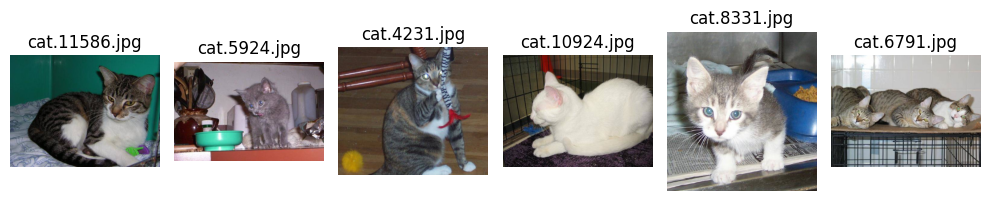

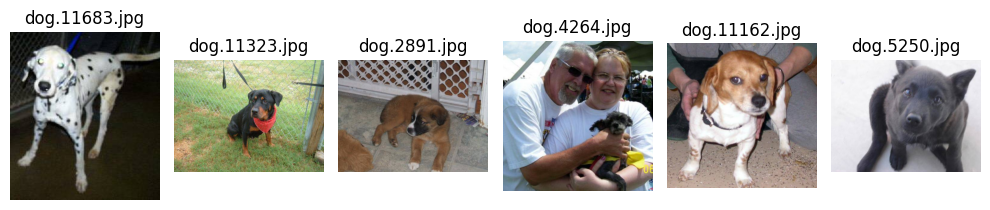

In [11]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def display_random_images(directory_path, num_images=6, num_columns=6):
    """
    Displays a specified number of randomly selected images from the given directory and its subdirectories.

    Args:
        directory_path (str): Path to the directory to select images from.
        num_images (int): Number of images to display.
        num_columns (int): Number of columns for the image grid display. Default is 2.
    """
    image_paths = []

    # Collect paths of all image files in the directory and subdirectories
    for dirpath, dirnames, filenames in os.walk(directory_path):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                image_paths.append(os.path.join(dirpath, filename))

    # Randomly select the specified number of images
    selected_image_paths = random.sample(image_paths, num_images)

    # Calculate the number of rows needed for the image grid
    num_rows = (num_images + num_columns - 1) // num_columns

    # Display the selected images in a grid layout
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(10, 6))
    axs = axs.flatten()

    for idx, image_path in enumerate(selected_image_paths):
        image = Image.open(image_path)
        axs[idx].imshow(image)
        axs[idx].set_title(image_path.split("/")[-1])
        axs[idx].axis('off')

    plt.tight_layout()
    plt.show()



# Provide the path to the directory you want to display images from
directory_to_display_cats = "/content/dataset/train/train/cats"
directory_to_display_dogs = "/content/dataset/train/train/dogs"



# Call the function to display random images from the specified directory
display_random_images(directory_to_display_cats)
display_random_images(directory_to_display_dogs)


Format: .jpg, Count: 25000


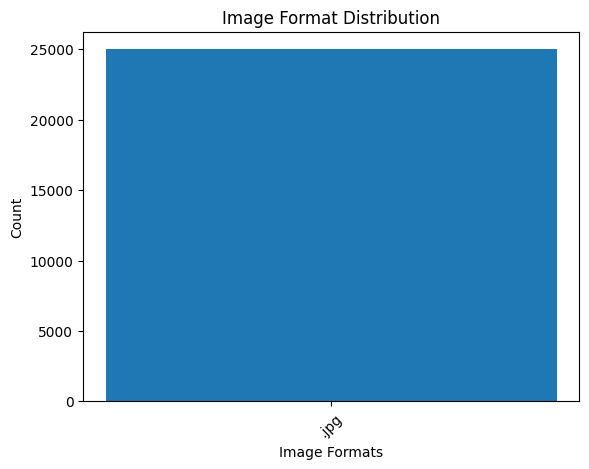

In [12]:
import os
import matplotlib.pyplot as plt

def plot_image_formats(folder_path):
    image_formats = {}

    for root, _, files in os.walk(folder_path):
        for file in files:
            _, extension = os.path.splitext(file)
            if extension not in image_formats:
                image_formats[extension] = 1
            else:
                image_formats[extension] += 1

    extensions = list(image_formats.keys())
    counts = list(image_formats.values())

    for ext, count in image_formats.items():
        print(f"Format: {ext}, Count: {count}")

    plt.bar(extensions, counts)
    plt.xlabel('Image Formats')
    plt.ylabel('Count')
    plt.title('Image Format Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Replace "folder_path" with the actual path to the folder containing images
folder_path = "/content/dataset/train"
plot_image_formats(folder_path)


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import sklearn.model_selection
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_path = "/content/dataset/train/train"
valid_path = "/content/dataset/train/valid"
test_path  = "/content/dataset/test/test"

In [36]:
# Define the path to the root directory containing subdirectories for each class

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.data import Dataset

data_directory = "/content/dataset/train/train"


batch_size = 32
image_size = (256, 256)
shuffle_seed = 42
validation_ratio = 0.2


# Create a dataset using image_dataset_from_directory
# Specify other relevant arguments like batch_size, image_size, etc.

datagen = ImageDataGenerator(

    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,

)

train_dataset = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=shuffle_seed,
    class_mode="binary"
)

# Veri kümesine veri artırma uygulama

data_directory = "/content/dataset/train/valid"
validation_datagen = ImageDataGenerator(rescale=1./255)

# Doğrulama veri kümesi akışı
validation_dataset = validation_datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=shuffle_seed,
    class_mode="binary"

)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
type(validation_dataset)

keras.preprocessing.image.DirectoryIterator

In [17]:
class_names = train_dataset.class_indices
print("Sınıf Adları ve Temsili:")
print(class_names)

Sınıf Adları ve Temsili:
{'cats': 0, 'dogs': 1}


In [19]:
class_names = validation_dataset.class_indices
print("Sınıf Adları ve Temsili:")
print(class_names)

Sınıf Adları ve Temsili:
{'cats': 0, 'dogs': 1}


In [ ]:

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))  # Adding dropout layer with a dropout rate of 0.5

model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.1))  # Adding dropout layer with a dropout rate of 0.5

model.add(Dense(units=1, activation="sigmoid"))  # Binary classification, so using sigmoid activation



In [21]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [23]:
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=10)

Epoch 1/10
625/625 [==============================] - 360s 575ms/step - loss: 1.3716 - accuracy: 0.5734 - val_loss: 0.6285 - val_accuracy: 0.6434
Epoch 2/10
625/625 [==============================] - 354s 567ms/step - loss: 0.6412 - accuracy: 0.6301 - val_loss: 0.6426 - val_accuracy: 0.6078
Epoch 3/10
625/625 [==============================] - 351s 562ms/step - loss: 0.6034 - accuracy: 0.6687 - val_loss: 0.6711 - val_accuracy: 0.6412
Epoch 4/10
625/625 [==============================] - 350s 560ms/step - loss: 0.6122 - accuracy: 0.6672 - val_loss: 0.6047 - val_accuracy: 0.6778
Epoch 5/10
625/625 [==============================] - 351s 561ms/step - loss: 0.5862 - accuracy: 0.6856 - val_loss: 0.6119 - val_accuracy: 0.6918
Epoch 6/10
625/625 [==============================] - 355s 568ms/step - loss: 0.5721 - accuracy: 0.6960 - val_loss: 0.6380 - val_accuracy: 0.6154
Epoch 7/10
625/625 [==============================] - 361s 577ms/step - loss: 0.5605 - accuracy: 0.7114 - val_loss: 0.6319 -

In [27]:
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=3)

Epoch 1/3
625/625 [==============================] - 364s 581ms/step - loss: 0.4902 - accuracy: 0.7699 - val_loss: 0.4931 - val_accuracy: 0.7590
Epoch 2/3
625/625 [==============================] - 361s 578ms/step - loss: 0.4751 - accuracy: 0.7775 - val_loss: 0.5638 - val_accuracy: 0.7568
Epoch 3/3
625/625 [==============================] - 361s 578ms/step - loss: 0.4652 - accuracy: 0.7886 - val_loss: 0.4662 - val_accuracy: 0.7824


In [40]:
history3 = model.fit(train_dataset,validation_data=validation_dataset,epochs=5)

Epoch 1/5
625/625 [==============================] - 357s 569ms/step - loss: 0.4452 - accuracy: 0.7994 - val_loss: 0.4911 - val_accuracy: 0.7806
Epoch 2/5
625/625 [==============================] - 355s 568ms/step - loss: 0.4379 - accuracy: 0.8019 - val_loss: 0.7544 - val_accuracy: 0.6876
Epoch 3/5
625/625 [==============================] - 365s 583ms/step - loss: 0.4294 - accuracy: 0.8113 - val_loss: 0.4191 - val_accuracy: 0.8128
Epoch 4/5
625/625 [==============================] - 364s 583ms/step - loss: 0.4187 - accuracy: 0.8169 - val_loss: 0.4716 - val_accuracy: 0.7904
Epoch 5/5
625/625 [==============================] - 365s 585ms/step - loss: 0.4063 - accuracy: 0.8256 - val_loss: 0.3790 - val_accuracy: 0.8332


In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Modeli eğitirken kullanılacak callback fonksiyonunu oluşturma
checkpoint_callback = ModelCheckpoint(
    filepath='best_model_efficient.h5',  # Kaydedilen modelin dosya adı ve yolu
    save_best_only=True,        # Sadece en iyi modeli kaydet
    monitor='val_accuracy',     # İzlenecek metrik (örneğin 'val_loss' veya 'val_accuracy')
    mode='max',                 # Metriğin maksimum değeri yakalandığında kaydet
    verbose=1,                  # Bilgi verme seviyesi
    save_weights_only=False     # True ise sadece ağırlıkları kaydet, False ise tam modeli kaydet
)

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# InceptionV3 modelini yükleyin (weights='imagenet' ile önceden eğitilmiş ağırlıklar kullanılır)
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

# Modeli dondurulan katmanlar ve son katman olarak bölmek için kullanın
for layer in base_model.layers:
    layer.trainable = False  # Tüm katmanları dondurun

# Modelin sonuna özelleştirilmiş bir çıkış katmanı ekleyin
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification için sigmoid aktivasyonu

# Yeni modeli oluşturun
model = Model(inputs=base_model.input, outputs=predictions)

# Yalnızca son katmanları eğitin
for layer in model.layers[len(base_model.layers):]:
    layer.trainable = True

# Modeli derleyin
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Model özetini görüntüle
model.summary()


In [21]:
# Modeli eğitin
history_inception_v3 = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
    epochs=10,
    validation_data=validation_dataset,
    validation_steps=validation_dataset.samples // validation_dataset.batch_size,
    callbacks=[checkpoint_callback]

)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.1880 - accuracy: 0.9258
Epoch 1: val_accuracy improved from -inf to 0.98458, saving model to best_model.h5
625/625 [==============================] - 376s 577ms/step - loss: 0.1880 - accuracy: 0.9258 - val_loss: 0.0437 - val_accuracy: 0.9846
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.9418
Epoch 2: val_accuracy improved from 0.98458 to 0.98498, saving model to best_model.h5
625/625 [==============================] - 363s 580ms/step - loss: 0.1458 - accuracy: 0.9418 - val_loss: 0.0449 - val_accuracy: 0.9850
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9421
Epoch 3: val_accuracy improved from 0.98498 to 0.98958, saving model to best_model.h5
625/625 [==============================] - 354s 566ms/step - loss: 0.1399 - accuracy: 0.9421 - val_loss: 0.0356 - val_accuracy: 0.9896
Epoch 4/10
625/625 [==============================] 

In [ ]:
# Modeli eğitin
history_inception_v3_2 = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
    epochs=2,
    validation_data=validation_dataset,
    validation_steps=validation_dataset.samples // validation_dataset.batch_size,
    callbacks=[checkpoint_callback]

)

In [ ]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# EfficientNetB7 modelini yükleyin (weights='imagenet' ile önceden eğitilmiş ağırlıklar kullanılır)
base_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Modeli dondurulan katmanlar ve son katman olarak bölmek için kullanın
for layer in base_model.layers:
    layer.trainable = False  # Tüm katmanları dondurun

# Modelin sonuna özelleştirilmiş bir çıkış katmanı ekleyin
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification için sigmoid aktivasyonu

# Yeni modeli oluşturun
model = Model(inputs=base_model.input, outputs=predictions)

# Yalnızca son katmanları eğitin
for layer in model.layers[len(base_model.layers):]:
    layer.trainable = True

# Modeli derleyin
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model özetini görüntüle
model.summary()

In [ ]:
history_efficientnet_b7 = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
    epochs=10,
    validation_data=validation_dataset,
    validation_steps=validation_dataset.samples // validation_dataset.batch_size,
    callbacks=[checkpoint_callback]

)

In [ ]:
# Evaluate the model.
model_inception_v3.evaluate(validation_dataset)

In [39]:
from tensorflow.keras.models import save_model

# Modeli eğitimi tamamlandıktan sonra
# model = ... (modelinizin nesnesi)

# Modeli kaydetme
save_model(model, 'saved_model')  # 'saved_model' klasörüne kaydedilecek


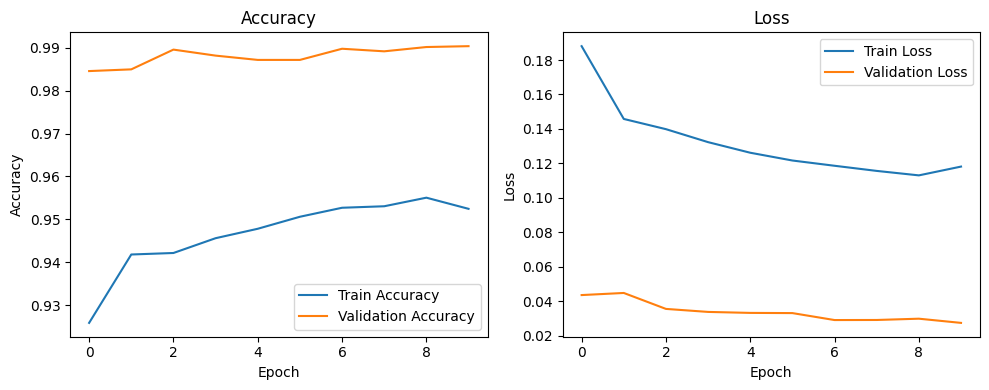

In [22]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Accuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage

plot_history(history_inception_v3)


In [24]:
test_data_directory = "/content/dataset/test"
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values between 0 and 1

test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode=None,  # Do not generate labels
    shuffle=False  # Do not shuffle the data for predictions
)


Found 8000 images belonging to 1 classes.


In [25]:
import pandas as pd

output_csv_path = "inception_v3.csv"  # Output CSV file path

# Generate predictions
predictions = model.predict(test_generator)

# Extract file names from generator
file_names = [os.path.basename(file) for file in test_generator.filenames]

# Create a DataFrame to store results
results_df = pd.DataFrame({"id": file_names, "labels": predictions[:, 0]})

# Convert predicted probabilities to binary labels (0 or 1)
results_df["labels"] = (results_df["labels"] > 0.5).astype(int)

# Save results to a CSV file
results_df.to_csv(output_csv_path, index=False)

print("Predictions saved to", output_csv_path)

250/250 [==============================] - 28s 108ms/step
Predictions saved to inception_v3.csv


In [54]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Resmi yükleyin
img = image.load_img("belcika-shutter.jpg", target_size=(256, 256))

# Resmi model girdi formatına çevirin
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Girişi [0, 1] aralığına ölçekleyin

# Predict işlemi
prediction = model.predict(img_array)

# Sınıfları ve olasılıkları görüntüleme
class_names = ['dogs', 'cats']  # Sınıf isimlerini ayarlayın
predicted_class = np.argmax(prediction[0])
predicted_probability = prediction[0][predicted_class]

print(f'Predicted class: {class_names[predicted_class]}')
print(f'Predicted probability: {predicted_probability}')


1/1 [==============================] - 0s 33ms/step
Predicted class: dogs
Predicted probability: 0.931978166103363
